In [183]:
import pandas as pd

x1 = []
x2 = []
x3 = []
x4 = []

with open("E:\iris.data") as file:
    for line in file:
        list = line.split(",") 
        x1.append(float(list[0]))
        x2.append(float(list[1]))
        x3.append(float(list[2]))
        x4.append(float(list[3]))

table = pd.DataFrame({})
for i in range(len(x1)):
    table[i+1] = [x1[i], x2[i], x3[i], x4[i]]
table.index = ["x1", "x2", "x3", "x4"]
table.head()

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
x1,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
x2,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
x3,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
x4,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


In [184]:
import numpy as np
from pandas import DataFrame
from sklearn.cluster import KMeans as k

data = {"x1": x1, "x2": x2, "x3": x3, "x4": x4}
df = DataFrame(data,columns=['x1','x2', 'x3', 'x4'])

model = k(n_clusters=4).fit(df)
model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.2525    , 2.855     , 4.815     , 1.625     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

In [185]:
data = model.fit_predict(df)
table.loc[4] = data
table.index = ["x1", "x2", "x3", "x4", "cluster"]
table.head()

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
x1,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
x2,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
x3,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
x4,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
cluster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0


In [186]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [187]:
import re

l = ["" for i in range(15)]
for i in range(15):
    s = "E:\\" + str(i+1) + ".txt"
    with open(s) as inf:
        l[i] = inf.read().lower()
        l[i] = re.sub(r"[,\t;:\(\)\.\"«»“”\d\+\?\[\]\']*", r"", l[i])
        l[i] = re.sub(r"[\n]+", r" ", l[i])

In [188]:
from nltk.corpus import stopwords
from string import punctuation

d = {}

for i in range(15):
    text = word_tokenize(text=l[i])
    result = []
    for word in text:
        if word in stopwords.words("english"):
            continue
        if word not in result:
            result.append(word)
    d[i] = result

In [189]:
list = []

for item in d[14]:
    k = 0
    for i in range(14):
        if item in d[i]:
            k += 1
    if k > 5:
        list.append(item)        
for word in ["might", "seen", "us", "went"]:
    list.append(word)

list

['century',
 'known',
 'world',
 'since',
 'years',
 'old',
 'made',
 'may',
 'complete',
 'great',
 'must',
 'work',
 'many',
 'called',
 'later',
 'one',
 'like',
 'used',
 'way',
 'find',
 'necessary',
 'together',
 'form',
 'different',
 'could',
 'use',
 'view',
 'found',
 'either',
 'upon',
 'year',
 'th',
 'new',
 'effect',
 'similar',
 'thus',
 'far',
 'seem',
 'greater',
 'able',
 'two',
 'much',
 'also',
 'another',
 'would',
 'become',
 'often',
 'earth',
 'following',
 'even',
 'long',
 'said',
 'men',
 'whose',
 'know',
 'name',
 'place',
 'knowledge',
 'held',
 'less',
 'thought',
 'might',
 'seen',
 'us',
 'went']

In [190]:
for i in range(15):
    for item in list:
        if item in d[i]:
            d[i].remove(item)
d

{0: ['system',
  'began',
  'alchemy',
  'centuries',
  'era',
  'special',
  'time',
  'sacred',
  'art',
  'divine',
  'science',
  'occult',
  'hermes',
  'commentator',
  'aristotle',
  'writing',
  'ad',
  'calls',
  'certain',
  'instruments',
  'fusion',
  'calcination',
  'chuika',
  'organa',
  'melting',
  'pouring',
  'hence',
  'probably',
  'came',
  'adjective',
  'chyic',
  'chymic',
  'somewhat',
  'word',
  'chemia',
  'deals',
  'calcinations',
  'fusions',
  'meltings',
  'writer',
  'treatise',
  'astrology',
  'speaking',
  'influences',
  'stars',
  'dispositions',
  'man',
  'says',
  'born',
  'mercury',
  'give',
  'astronomy',
  'mars',
  'follow',
  'profession',
  'arms',
  'saturn',
  'devote',
  'scientia',
  'alchemiae',
  'alchemia',
  'appears',
  'formed',
  'prefixing',
  'arabic',
  'al',
  'meaning',
  'greek',
  'origin',
  'growth',
  'development',
  'transformation',
  'chemistry',
  'consider',
  'transforming',
  'necessarily',
  'pay',
  'att

In [191]:
l1 = []

for item in d[4]:
    k = 0
    for i in range(4):
        if item in d[i]:
            k += 1
    if k > 2:
        l1.append(item)
l1

['alchemy',
 'material',
 'things',
 'alchemists',
 'thing',
 'chapter',
 'alchemical',
 'mercury',
 'evidently',
 'substance',
 'substances',
 'cause',
 'spirit',
 'first',
 'put',
 'certain',
 'changed',
 'time',
 'see',
 'philosophers',
 'followed',
 'every',
 'laboratory',
 'essence',
 'virtue',
 'gold',
 'sages',
 'metals']

In [192]:
l2 = []

for item in d[9]:
    k = 0
    for i in range(5, 9):
        if item in d[i]:
            k += 1
    if k > 2:
        l2.append(item)
l2

['land',
 'water',
 'surface',
 'weathering',
 'waste',
 'slopes',
 'beneath',
 'rocks',
 'soluble',
 'heat',
 'surfaces',
 'everywhere',
 'carried',
 'sea',
 'rain',
 'agencies',
 'soil',
 'vegetation',
 'streams',
 'mantle',
 'rock',
 'granite',
 'clay',
 'shale',
 'fast',
 'broken',
 'sand',
 'loose',
 'dry',
 'fig',
 'feet',
 'hills',
 'away',
 'cut',
 'formed',
 'along',
 'several',
 'little',
 'cold',
 'rains',
 'chemical',
 'well',
 'left',
 'country',
 'limestone',
 'insoluble',
 'decay',
 'toward',
 'sometimes',
 'layer',
 'slowly',
 'river',
 'strata',
 'layers',
 'reach',
 'planes',
 'whole',
 'miles',
 'rapidly',
 'action',
 'forms',
 'sheets',
 'masses',
 'grains',
 'brought',
 'process',
 'soft',
 'clays',
 'removed',
 'lands',
 'cover',
 'earths']

In [193]:
l3 = []

for item in d[14]:
    k = 0
    for i in range(10, 14):
        if item in d[i]:
            k += 1
    if k > 2:
        l3.append(item)
l3

['period',
 'greek',
 'accurate',
 'astronomy',
 'heavens',
 'days',
 'hipparchus',
 'science',
 'observations',
 'referred',
 '’',
 'generally',
 'invented',
 'system',
 'observation',
 'fact',
 'set',
 'point',
 'object',
 'stars',
 'positions',
 'modern',
 'kepler',
 'tables',
 'correct',
 'lunar',
 'theory',
 'orbit',
 'moon',
 'motions',
 'planets',
 'laws',
 'supported',
 'stated',
 'egyptian',
 'de',
 'fixed',
 'solar',
 'astronomers',
 'views',
 'motion',
 'among',
 'astronomical',
 'position',
 'seemed',
 'circular',
 'greeks']

In [194]:
x1 = []
x2 = []
x3 = []

for i in range(15):
    k = 0
    for item in l1:
        if item in d[i]:
            k += 1
    x1.append(k)
    k = 0
    for item in l2:
        if item in d[i]:
            k += 1
    x2.append(k)
    k = 0
    for item in l3:
        if item in d[i]:
            k += 1
    x3.append(k)
    
table = pd.DataFrame({})
for i in range(len(x1)):
    table[i+1] = [x1[i], x2[i], x3[i]]
table.index = ["x1", "x2", "x3"]
table.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
x1,25,25,19,23,28,4,7,3,6,5,4,5,6,6,2
x2,8,10,10,6,10,52,59,63,66,72,7,4,7,6,1
x3,8,5,1,2,2,1,3,4,1,2,40,29,46,41,47


In [196]:
from sklearn.cluster import KMeans as k

data = {"x1": x1, "x2": x2, "x3": x3}
df = DataFrame(data, columns=['x1','x2', 'x3'])

model1 = k(n_clusters=3).fit(df)
model1.cluster_centers_

array([[24. ,  8.8,  3.6],
       [ 5. , 62.4,  2.2],
       [ 4.6,  5. , 40.6]])

In [197]:
data = model1.fit_predict(df)
table.loc[4] = data
table.index = ["x1", "x2", "x3", "cluster"]
table.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
x1,25,25,19,23,28,4,7,3,6,5,4,5,6,6,2
x2,8,10,10,6,10,52,59,63,66,72,7,4,7,6,1
x3,8,5,1,2,2,1,3,4,1,2,40,29,46,41,47
cluster,1,1,1,1,1,0,0,0,0,0,2,2,2,2,2


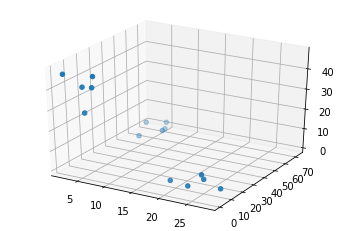

In [204]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, label='text')